In [2]:
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re # 정규식

### 열 이름이 변수 이름이 아니라 값인 경우

In [3]:
df=pd.read_csv("./data/pew-raw.csv")

# 데이터 재편성
# value_var 미정의 시 id외의 나머지로 인식
df1 = pd.melt(df,["religion"], var_name="income", value_name="freq")
df1 = df1.sort_values(by=["religion"]) # 종교 이름순으로 정렬
df1.head(10) # 상단 10개만 보겠습니다.

,religion,income,freq
0,Agnostic,<$10k,27
30,Agnostic,$30-40k,81
40,Agnostic,$40-50k,76
50,Agnostic,$50-75k,137
10,Agnostic,$10-20k,34
20,Agnostic,$20-30k,60
41,Atheist,$40-50k,35
21,Atheist,$20-30k,37
11,Atheist,$10-20k,27
31,Atheist,$30-40k,52


In [7]:
df = pd.read_csv("./data/billboard.csv", encoding="mac_latin2")

id_vars = ["year","artist.inverted","track","time","genre","date.entered","date.peaked"]
df1 = pd.melt(frame=df,id_vars=id_vars, var_name="week", value_name="rank")
# 에러 메세지 please set the 'value_name' parameter of DataFrame.melt to a unique name.
df1.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


In [9]:
# Formatting
df2 = df1

# 정규식으로 x1st.week 에서 숫자 1만 추출
# df2["week"] = df1['week'].str.extract('(\d+)', expand=False).astype(int)
df2["week1"] = df2["week"].str.extract(r'(\d+)', expand=False).astype(int)

# rank를 정수화 처리
# NAN 등의 값은 에러가 나기 대문에 무시하기로 함
df2["rank1"] = df2["rank"].astype('int', errors='ignore')

# 필요없는 행을 삭제합니다.
df3 = df2.dropna()
df3.tail()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,week1,rank1
19663,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x63rd.week,45.0,63,45.0
19700,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,x63rd.week,50.0,63,50.0
19980,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,x64th.week,50.0,64,50.0
20017,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,x64th.week,50.0,64,50.0
20334,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,x65th.week,49.0,65,49.0


In [13]:
pd.to_datetime(df3['date.entered'])
pd.to_timedelta(df3['week1'], unit='w')
pd.to_timedelta(df3['week1'] * 7, unit='D')
df3['date'] = pd.to_datetime(df3['date.entered']) + pd.to_timedelta(df3['week1'] - 1, unit='w')


C:\Users\User\AppData\Local\Temp/ipykernel_4652/2153362266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(df3['date.entered']) + pd.to_timedelta(df3['week1'] - 1, unit='w')


### 하나의 표에 반복되는 데이터가 있을 경우

In [14]:
billboard = df3

# song 관련 필드를 선별
songs_cols = ["year", "artist.inverted", "track", "time", "genre"]

# billboard 데이터에서 song관련 컬럼만 추출하고 중복값을 제거(drop_duplicates())한다.
songs = billboard[songs_cols].drop_duplicates()

# 인덱스를 재정리 한다.
songs = songs.reset_index(drop=True)

# 인덱스를 song_id에 부여한다.
songs["song_id"] = songs.index

# rank를 포함하는 데이터를 새로만든다.
# 연결을 위해 song_id를 포함하였다.(필드만)
ranks = pd.merge(billboard, songs, on=["year", "artist.inverted","track","time","genre"])
ranks = ranks[['song_id','date','rank']]
ranks.head(5)

,song_id,date,rank
0,0,2000-09-23,78.0
1,0,2000-09-30,63.0
2,0,2000-10-07,49.0
3,0,2000-10-14,33.0
4,0,2000-10-21,23.0


### 다양한 변수가 하나의 열에 있는 경우

In [17]:
df = pd.read_csv("./data/tb-raw.csv")

# 원시데이터는 df에 가공된 데이터 df1에
df1 = pd.melt(df,
    id_vars = ["country","year"], # id를 정의(기준 항목)
    var_name = "sex_and_age", # variable을 정의
    value_name = "cases") # value를 정의

df1.head()

,country,year,sex_and_age,cases
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


In [18]:
# 성별, 나이 하한값, 나이 상한값 추출
# ==> m014 m1524 m2534 m3544 m4554 m5564
tmp_df = df1["sex_and_age"].str.extract(r"(\D)(\d+)(\d{2})", expand=False)
tmp_df.info

<bound method DataFrame.info of     0  1   2
0   m  0  14
1   m  0  14
2   m  0  14
3   m  0  14
4   m  0  14
.. .. ..  ..
85  f  0  14
86  f  0  14
87  f  0  14
88  f  0  14
89  f  0  14

[90 rows x 3 columns]>

In [20]:
df = pd.melt(df, id_vars=["country","year"], value_name="cases", var_name="sex_and_age")

# Extract Sex, Age lower bound and Age upper bound group
tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})", expand=False)

# Name columns
tmp_df.columns = ["sex", "age_lower", "age_upper"]

# Create `age`column based on `age_lower` and `age_upper`
tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

# Merge
df = pd.concat([df, tmp_df], axis=1)

# Drop unnecessary columns and rows
df = df.drop(['sex_and_age',"age_lower","age_upper"], axis=1)
df = df.dropna()
df = df.sort_values(ascending=True,by=["country", "year", "sex", "age"])
df.head(10)

,country,year,cases,sex,age
0,AD,2000,0.0,m,0-14
10,AD,2000,0.0,m,15-24
20,AD,2000,1.0,m,25-34
30,AD,2000,0.0,m,35-44
40,AD,2000,0.0,m,45-54
50,AD,2000,0.0,m,55-64
81,AE,2000,3.0,f,0-14
1,AE,2000,2.0,m,0-14
11,AE,2000,4.0,m,15-24
21,AE,2000,4.0,m,25-34


### 변수가 행과 열에 모두 포함되어 있는 경우

In [24]:
df = pd.read_csv("./data/weather-raw.csv")

df1 = pd.melt(df, id_vars=["id", "year","month","element"], var_name="day_raw")

# Extracting day
df1["day"] = df1["day_raw"].str.extract("d(\d+)", expand=False)
df1["id"] = "MX17004"

# To numeric values
df1[["year","month","day"]] = df1[["year","month","day"]].apply(lambda x: pd.to_numeric(x, errors='ignore'))

# Creating a date from the different columns
import datetime
def create_date_from_year_month_day(row):
    return datetime.datetime(year=row["year"], month=int(row["month"]), day=row["day"])

df1["date"] = df1.apply(lambda row: create_date_from_year_month_day(row), axis=1)
df = df1.drop(['year',"month","day", "day_raw"], axis=1)
df = df1.dropna()

# Unmelting column "element"
df = df.pivot_table(index=["id","date"], columns="element", values="value")
df.reset_index(drop=False, inplace=True)
df

element,id,date,tmax,tmin
0,MX17004,2010-02-02,27.3,14.4
1,MX17004,2010-02-03,24.1,14.4
2,MX17004,2010-03-05,32.1,14.2


### 하나의 관측단위가 여러 파일에 나누어져 있는 경우

In [25]:
df14 = pd.read_csv("./data/2014-baby-names-illinois.csv")
df15 = pd.read_csv("./data/2015-baby-names-illinois.csv")

# 파일명 가져오기
path = './data'
allFiles = glob.glob(path + "/201*-baby-names-illinois.csv")

# 파일명에서 년도 추출하는 사용자함수
def extract_year(string):
    match = re.match(".+(\d{4})", string)
    if match != None: 
        return match.group(1)

# 파일 합치고, year 추가하기
frame = pd.DataFrame()
df_list= []
for file_ in allFiles:
    df = pd.read_csv(file_, index_col=None, header=0)
    df.columns = map(str.lower, df.columns)
    df["year"] = extract_year(file_)
    df_list.append(df)

df = pd.concat(df_list)
df

,rank,name,frequency,sex,year
0,1,Noah,837,Male,2014
1,2,Alexander,747,Male,2014
2,3,William,687,Male,2014
3,4,Michael,680,Male,2014
4,5,Liam,670,Male,2014
...,...,...,...,...,...
95,96,Giovanni,168,Male,2015
96,97,Hudson,167,Male,2015
97,98,Camden,165,Male,2015
98,99,Max,164,Male,2015


In [26]:
# (참조) 함수 내부 가능 점검
string = './data\\2014-baby-names-illinois.csv'
match = re.match(".+(\d{4})", string)
print(match)

if match != None:
    print('match ==> ', match.group(0), match.group(1))

<re.Match object; span=(0, 11), match='./data\\2014'>
match ==>  ./data\2014 2014


### 복지 패널 데이터

In [27]:
! pip install pyreadstat

In [28]:
import pandas as pd

# 가구용 데이터 가져오기import pandas as pd
df_spss_h = pd.read_spss("./data/Koweps_h15_2020_beta1.sav")
df_spss_h.head()

,h15_id,h15_ind,h15_sn,h15_merkey,h_new,h15_cobf,h15_ws,h15_wg,h15_ws_all,h15_wg_all,...,h1516_4aq7,h1516_56,h1516_60,h1516_64,h1516_15aq1,h1517_3,h1517_4,h1517_5,h1517_6,h1517_7
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.469122,2027.661520,0.520546,1736.800072,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,2.0,2.0
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.615895,2662.047105,0.668401,2230.116667,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3.0,1.0,1.0
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.421085,1820.033346,0.469512,1566.525685,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.670485,2898.000026,0.742898,2478.676245,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,2.0,2.0
4,8.0,1.0,1.0,80101.0,0.0,NaN,0.250710,1083.629200,0.260801,870.159920,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,4.0,2.0,1.0


In [29]:
# 가구원용 데이터 가져오기import pandas as pd
df_spss_p = pd.read_spss("./data/Koweps_p15_2020_beta1.sav")
df_spss_p.head()

,h15_id,h15_ind,h15_sn,h15_merkey,h_new,h15_pind,h15_pid,p15_fnum,p15_tq,p15_ws_c,...,np1506_36,np1506_37,np1506_38,np1506_39,np1506_40,np1506_41,np1506_42,np1506_43,np1506_44,p1506_3aq1
0,2.0,1.0,1.0,20101.0,0.0,1.0,201.0,1.0,3.0,0.283522,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,1.0,1.0,30101.0,0.0,1.0,301.0,1.0,3.0,0.384446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,1.0,1.0,40101.0,0.0,1.0,401.0,1.0,3.0,0.250490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.0,1.0,1.0,60101.0,0.0,1.0,601.0,1.0,3.0,0.587401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.0,1.0,1.0,60101.0,0.0,1.0,602.0,2.0,3.0,1.031561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_h = df_spss_h.copy()
df_p = df_spss_p.copy()

* 복지패널 데이터에서의 분석 주제
1. 남여의 월급 차이가 있을까? --> 성별, 월급
2. 언제 월급을 가장 많이 받을까? <\t> --> 나이, 월급
3. 40대가 많이 받을까, 50대가 많이 받을까? --> 연령대, 월급
4. 남여별 연령대에서 월급차이는 얼마나 차이가 날까? --> 성별, 연령대, 월급
5. 월급을 가장 많이 받은 대학전공계열은 뭐지? --> 대학전공계열, 월급
6. 남자,여자 각각 어떤 대학전공계열에 가장 많이 종사할까? --? 대학전공계열, 성별, 인원수
7. 연령대별 혼인상태는 어떤가?(사별, 혼인, 이혼등) --> 연령대, 혼인상태
8. 어느 나이때가 기부를 많이 할까? --> 연령대, 기부금
9. 어느 연령대가 연간 평균 음주량이 가장 많은가? --> 연령대, 년간 평균음주량
10. 어느 연령대가 음주시 마시는 술잔 횟수가 많을가? --> 연령대, 음주시 마시는 술잔 횟수
11. 노년층이 많은 지역은 어디인가? --> 연령대, 지역

In [31]:
# 기구용 데이터 구조 확인
print(type(df_h), "\n")
print(df_h.shape, "\n")
print(df_h.info(), "\n")

<class 'pandas.core.frame.DataFrame'> 

(6029, 998) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6029 entries, 0 to 6028
Columns: 998 entries, h15_id to h1517_7
dtypes: float64(997), object(1)
memory usage: 45.9+ MB
None 



<가구용>
- 한개를 제외하고 모든 칼럼이 수치이다.
- 칼럼은 코드형식이고 별도 의미를 가지고 있다. 의미 파악을 위해 자료를 참조한다(코딩북의 "조사설계서-가구원용" 파일)
- 각 필드가 "h15_id, h15_ind, h15_sn,..." 형태의 코드성이므로, 의미를 알 수 있는 명칭으로 변경한다.(코딩북 참조)
-998 columns 이므로 분석 대상 칼럼만 분리한다.

In [32]:
#가구원용 데이터 구조 확인
print(type(df_p), "\n")
print(df_p.shape, "\n")
print(df_p.info(), "\n")

<class 'pandas.core.frame.DataFrame'> 

(11457, 200) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11457 entries, 0 to 11456
Columns: 200 entries, h15_id to p1506_3aq1
dtypes: float64(200)
memory usage: 17.5 MB
None 



<가구원용>
- 모든 칼럼이 수치이다.
- 칼럼은 코드형식이고 별도 의미를 가지고 있다. 의미 파악을 위해 자료를 참조한다(코딩북의 "조사설계서-가구원용" 파일)
- 각 필드가 "h15_id, h15_ind, h15_sn,..." 형태의 코드성이므로, 의미를 알 수 있는 명칭으로 변경한다.(코딩북 참조)
- 200 columns 이므로 분석 대상 칼럼만 분리한다.
- 단위에 주의 한다.(급여는 만원단위이고, 근무는 월 단위이다)

In [35]:
# 항목별 칼럼명 리스트
sexs = ['h1501_4','h1501_16', 'h1501_28', 'h1501_40','h1501_52', 'h1501_64', 'h1501_76','h1501_88', 'h1501_100']
birth_years = ['h1501_5','h1501_17', 'h1501_29', 'h1501_41', 'h1501_53', 'h1501_65', 'h1501_77', 'h1501_89', 'h1501_101']
marrieds = ['h1501_11','h1501_23','h1501_35', 'h1501_47', 'h1501_59', 'h1501_71', 'h1501_83', 'h1501_95', 'h1501_107']
job_types = ['h1503_8', 'h1503_18', 'h1503_28', 'h1503_38', 'h1503_48', 'h1503_58', 'h1503_68', 'h1503_78', 'h1503_88']

df_h[sexs].head()
df_h[birth_years].head()
df_h[marrieds].head()
df_h[job_types].head()

#@@@_data에 시리즈 형태로 칼럼 저장
sexs_data = df_h[sexs]
birth_years_data = df_h[birth_years]
marrieds_data = df_h[marrieds]
job_types_data = df_h[job_types]

df_h_job = df_h[job_types]

type(df_h_job)
df_h_job

,h1503_8,h1503_18,h1503_28,h1503_38,h1503_48,h1503_58,h1503_68,h1503_78,h1503_88
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,532.0,NaN,NaN,NaN,941.0,NaN,NaN,NaN,NaN
4,999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6025,NaN,611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6027,743.0,611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# 개인패널 ID
h15_pid = ["h15_pid"+str(i) for i in range(1,10)]
h15_pid
df_h[h15_pid] # 개인패널 ID
# --> NaN 결측은 조사된 정보가 없다는 것이다.


,h15_pid1,h15_pid2,h15_pid3,h15_pid4,h15_pid5,h15_pid6,h15_pid7,h15_pid8,h15_pid9
0,201.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,401.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,601.0,602.0,603.0,604.0,605.0,NaN,NaN,NaN,NaN
4,801.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6024,979502.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6025,979601.0,979602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6026,979702.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6027,979801.0,979802.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# 성별 ID: h1501_4 , h1501_16 , h1501_28 , h1501_40 , h1501_52 , h1501_64 , h1501_76 , h15
h15_pid = ["h15_pid1",]
h15_pid = ["h15_pid"+str(i) for i in range(1,10)]
h15_pid
pannel_ids = df_h[h15_pid] # 개인패널 ID

pannel_ids[h15_pid[1]]

for aa in pannel_ids[h15_pid[1]]:
    print(aa) #개인 패널 ID 출력

nan
nan
nan
602.0
nan
1002.0
1202.0
nan
1502.0
1602.0
nan
nan
2501.0
nan
2602.0
nan
nan
3403.0
3802.0
nan
nan
4502.0
4602.0
4702.0
4802.0
nan
5405.0
5702.0
5902.0
6102.0
6302.0
6602.0
7103.0
7203.0
7402.0
nan
7802.0
7902.0
nan
8302.0
8502.0
8505.0
8602.0
8651.0
8702.0
nan
nan
9302.0
9602.0
nan
9702.0
9802.0
9902.0
nan
10002.0
10202.0
nan
nan
10551.0
10902.0
11001.0
11802.0
11902.0
nan
12401.0
12602.0
12651.0
12702.0
12902.0
13102.0
13203.0
13302.0
13402.0
nan
13702.0
13802.0
nan
13904.0
nan
14203.0
nan
14602.0
nan
14951.0
14954.0
nan
nan
nan
nan
15602.0
15652.0
15802.0
16104.0
16103.0
16502.0
16602.0
16603.0
nan
16902.0
17502.0
17802.0
18002.0
18102.0
18202.0
18502.0
nan
nan
nan
19002.0
19102.0
19302.0
19502.0
19702.0
20202.0
nan
20402.0
20602.0
nan
20902.0
nan
nan
21502.0
21602.0
nan
nan
22002.0
nan
22502.0
nan
23002.0
23102.0
23103.0
nan
nan
24101.0
24202.0
24402.0
24602.0
24703.0
24802.0
24803.0
25002.0
25003.0
25102.0
25402.0
25602.0
25802.0
26302.0
26402.0
26603.0
26802.0
nan
nan


In [50]:
# cell별 데이터를 행으로 편성 - 패널ID
cnt = len(h15_pid) #패널ID의 개수 9
pannels = [] #전체 패널의 ID
for i in range(cnt): # 필드 수 만큼
    for pid in pannel_ids[h15_pid[i]]:
        pannels.append(pid)

print(len(pannels))

54261


In [39]:
# cell별 데이터를 행으로 편성 - 패널ID
cnt = len(h15_pid)
pannels_list = []
sexs_lists = []
birth_years_lists = []
marrieds_lists = []
job_types_lists = []

for i in range(cnt): # 필드 수 만큼
    for data in pannel_ids[h15_pid[i]]:
        pannels_list.append(data)
    for data in sexs_data[sexs[i]]:
        sexs_lists.append(data)
    for data in birth_years_data[birth_years[i]]:
        birth_years_lists.append(data)
    for data in marrieds_data[marrieds[i]]:
        marrieds_lists.append(data)
    for data in job_types_data[job_types[i]]:
        job_types_lists.append(data)

print('pannels_list: ', len(pannels_list))
print('sexs_lists', len(sexs_lists))
print('birth_years_lists', len(birth_years_lists))
print('marrieds_lists', len(marrieds_lists))
print('job_types_lists', len(job_types_lists))

pannels_list:  54261
sexs_lists 54261
birth_years_lists 54261
marrieds_lists 54261
job_types_lists 54261


In [40]:
# 데이터프레임 생성
raw_data = {'pannel_id': pannels_list,
    'sex': sexs_lists,
    'birth_years': birth_years_lists,
    'married':marrieds_lists ,
    'job_type': job_types_lists }

df = pd.DataFrame(raw_data)
df

,pannel_id,sex,birth_years,married,job_type
0,201.0,2.0,1945.0,2.0,NaN
1,301.0,1.0,1948.0,2.0,942.0
2,401.0,1.0,1942.0,3.0,762.0
3,601.0,1.0,1962.0,1.0,532.0
4,801.0,2.0,1940.0,2.0,999.0
...,...,...,...,...,...
54256,NaN,NaN,NaN,NaN,NaN
54257,NaN,NaN,NaN,NaN,NaN
54258,NaN,NaN,NaN,NaN,NaN
54259,NaN,NaN,NaN,NaN,NaN


In [41]:
#가구원용에서 칼럼 추출
#3개의 key : value를 가진 딕셔너리
# 개인패널ID : h15_pid

col = ['h15_pid', 'p1502_8aq1', 'p1507_3aq5', 'p1504_5', 'p1505_2', 'p1505_3']
df_p_sel = df_p[col] # 별도 분리 함

# 칼럼명 변경하기
# --> df.rename(columns={"A": "a", "B": "c"})

df_p_sel.rename(columns = {'h15_pid' : 'pannel_id', 'p1502_8aq1' : 'salary',
    'p1507_3aq5' : 'major', 'p1504_5' : 'donation',
    'p1505_2' : 'drink_qty', 'p1505_3' : 'drink_freq'
    }, inplace=True)

df_p_sel # 변경된 것 확인

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,pannel_id,salary,major,donation,drink_qty,drink_freq
0,201.0,NaN,NaN,NaN,5.0,NaN
1,301.0,167.0,NaN,NaN,5.0,NaN
2,401.0,78.0,NaN,NaN,5.0,NaN
3,601.0,NaN,NaN,NaN,5.0,NaN
4,602.0,NaN,NaN,12.0,5.0,NaN
...,...,...,...,...,...,...
11452,980002.0,NaN,NaN,NaN,5.0,NaN
11453,980003.0,NaN,NaN,NaN,5.0,NaN
11454,980004.0,89.0,NaN,NaN,5.0,NaN
11455,980005.0,184.0,NaN,NaN,5.0,NaN


In [42]:
#가구용, 가구원용 합치기
df = df.sort_values("pannel_id")
df1 = df.set_index("pannel_id")

df_p_sel = df_p_sel.sort_values("pannel_id")
df2 = df_p_sel.set_index("pannel_id")

# 합치기
df = []
df
# df = pd.concat([df1,df2])
# df.head(12)
df = pd.concat([df1,df2],axis=1)
df.head(10)

,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq
pannel_id,,,,,,,,,
201.0,2.0,1945.0,2.0,NaN,NaN,NaN,NaN,5.0,NaN
301.0,1.0,1948.0,2.0,942.0,167.0,NaN,NaN,5.0,NaN
401.0,1.0,1942.0,3.0,762.0,78.0,NaN,NaN,5.0,NaN
601.0,1.0,1962.0,1.0,532.0,NaN,NaN,NaN,5.0,NaN
602.0,2.0,1963.0,1.0,NaN,NaN,NaN,12.0,5.0,NaN
603.0,2.0,2003.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
604.0,1.0,1927.0,1.0,NaN,NaN,NaN,NaN,5.0,NaN
605.0,2.0,1934.0,1.0,941.0,27.0,NaN,NaN,5.0,NaN
801.0,2.0,1940.0,2.0,999.0,27.0,NaN,NaN,5.0,NaN


In [51]:
df.to_excel('./data/survey15.xlsx')

* 복지패널 데이터에서의 분석 주제
1. 남여의 월급 차이가 있을까? --> 성별, 월급
2. 언제 월급을 가장 많이 받을까? <\t> --> 나이, 월급
3. 40대가 많이 받을까, 50대가 많이 받을까? --> 연령대, 월급
4. 남여별 연령대에서 월급차이는 얼마나 차이가 날까? --> 성별, 연령대, 월급
5. 월급을 가장 많이 받은 대학전공계열은 뭐지? --> 대학전공계열, 월급
6. 남자,여자 각각 어떤 대학전공계열에 가장 많이 종사할까? --? 대학전공계열, 성별, 인원수
7. 연령대별 혼인상태는 어떤가?(사별, 혼인, 이혼등) --> 연령대, 혼인상태
8. 어느 나이때가 기부를 많이 할까? --> 연령대, 기부금
9. 어느 연령대가 연간 평균 음주량이 가장 많은가? --> 연령대, 년간 평균음주량
10. 어느 연령대가 음주시 마시는 술잔 횟수가 많을가? --> 연령대, 음주시 마시는 술잔 횟수
11. 노년층이 많은 지역은 어디인가? --> 연령대, 지역

In [53]:
df=pd.read_excel('./data/survey15.xlsx')
df.head()

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq
0,201,2,1945,2,NaN,NaN,NaN,NaN,5.0,NaN
1,301,1,1948,2,942.0,167.0,NaN,NaN,5.0,NaN
2,401,1,1942,3,762.0,78.0,NaN,NaN,5.0,NaN
3,601,1,1962,1,532.0,NaN,NaN,NaN,5.0,NaN
4,602,2,1963,1,NaN,NaN,NaN,12.0,5.0,NaN


In [60]:
# 그래프 그리기 --> 그래프에서 데이터 형태를 파악
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 포트깨지는 현상 대응하기
from matplotlib import font_manager, rc
# font_path = "./한글폰트.ttf" # 폰트 파일 위치
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

#### 남여의 월급 차이가 있을까? --> 성별, 월급

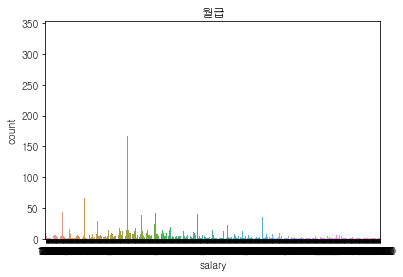

In [55]:
# 전처리
# 전처리를 위해서 데이터값을 점검한다
df['sex'].values, df['sex'].value_counts()
# 1,2 값만 있음. 이외의 값은 nan처리

len(df['sex']), df['sex'].isnull().sum() #전체건수, na건수

# 성별 코드를 명칭으로 바꾸기
df['sex'] = df['sex'].map({1:'남자', 2:'여자'}, na_action=None)

df['salary'].isnull().sum() # --> 8973

# countplot : 각 카테고리 값별로 데이터가 얼마나 있는지 표시
ax = plt.subplots()
ax = sns.countplot(x="salary", data=df)
plt.title("월급")
# plt.ylim(0,180)
# plt.xlim(0,400)
plt.show()

In [56]:
# 구간 정의 (0-~2200을 100단위싹)
bins = list(range(0,2201, 100))
bins # 데이터 확인

# 레이블 준비
# --> 레이블: 100미만, 200미만 ...
bins_labels = [ str(x)+"미만" for x in bins[1:]]
bins_labels

# df에 "salary_bin" 추가
df['salary_bin'] = pd.cut(df['salary'], bins, right=False, labels=bins_labels[:])
# 데이터 확인하기
df[['salary','salary_bin']]

,salary,salary_bin
0,NaN,NaN
1,167.0,200미만
2,78.0,100미만
3,NaN,NaN
4,NaN,NaN
...,...,...
13455,NaN,NaN
13456,NaN,NaN
13457,89.0,100미만
13458,184.0,200미만


C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0, flags=flags)


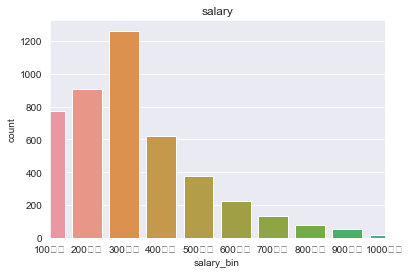

In [62]:
# 그래프를 그려보자
ax = plt.subplots()
ax = sns.countplot(x="salary_bin", data=df)
plt.title("salary")
# plt.ylim(0,600)
plt.xlim(0,9)
plt.show()

In [57]:
sex_salary = df.groupby('sex')['salary'].agg(**{ 'salary_mean':'mean',
    'salary_median':'median'}).reset_index() ## 성별 월급
sex_salary

# 남자와 여자의 월급비교
round(sex_salary.loc[0,"salary_mean"] / sex_salary.loc[1,"salary_mean"], 2)

1.86

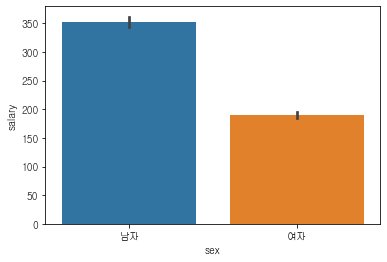

In [58]:
df = df.sort_values(by='sex')
sns.barplot(data= df, x= "sex", y= "salary")
plt.show()

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50668 missing from current fon

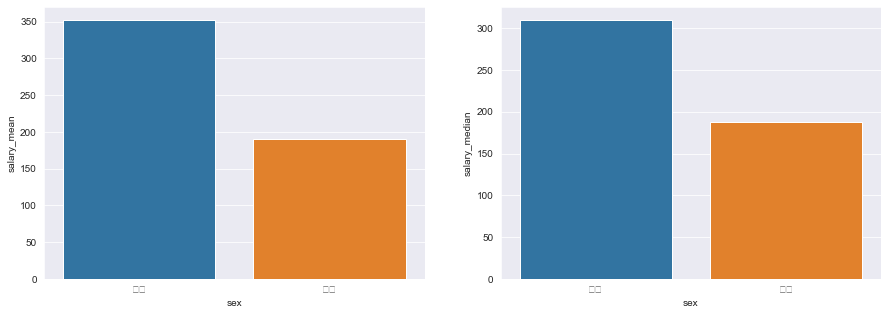

In [61]:
# 그래프 추가 (평균, 중앙값)
df = df.sort_values(by='sex')

sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))

area1 = fig.add_subplot(1,2,1)
area2 = fig.add_subplot(1,2,2)

sns.barplot(data =sex_salary, x="sex", y="salary_mean", ax = area1)
sns.barplot(data =sex_salary, x="sex", y="salary_median", ax = area2 )

plt.show()

남자가 여자보다 월급이 1.86배 많다. <br>
남자는 평균이 중앙값보다 약 42가 높다.고소득이 많다. <br>
여자는 평균이 중앙값과 거의 유사하다.

#### 언제 월급을 가장 많이 받을까? --> 나이 월급

In [64]:
# 전처리
# - 전처리를 위해서 데이터값을 점검한다
df['birth_years'].values, \
df['birth_years'].value_counts(), \
df['birth_years'].describe()

(array([1938, 1931, 1979, ..., 1966, 1980, 1945], dtype=int64),
 1942    301
 1947    242
 1939    241
 1940    235
 1943    224
        ... 
 1924      3
 1920      2
 1917      1
 1919      1
 1907      1
 Name: birth_years, Length: 103, dtype: int64,
 count    13460.000000
 mean      1969.469316
 std         24.393833
 min       1907.000000
 25%       1948.000000
 50%       1967.000000
 75%       1990.000000
 max       2019.000000
 Name: birth_years, dtype: float64)

In [65]:
len(df['birth_years']), df['birth_years'].isnull().sum() # --> 전체건수, na건수

# 나이를 계산해서 'old'에 넣어주자
df['old'] = [2021 - y + 1 for y in df['birth_years']]

# 데이터 확인
df[['birth_years', 'old']]

,birth_years,old
6729,1938,84
12836,1931,91
7132,1979,43
7130,1946,76
7127,2004,18
...,...,...
2528,1963,59
7659,1994,28
7658,1966,56
2512,1980,42


In [66]:
df['salary'].describe()

count    4487.000000
mean      271.556274
std       200.484282
min         0.000000
25%       150.000000
50%       230.000000
75%       350.000000
max      2167.000000
Name: salary, dtype: float64

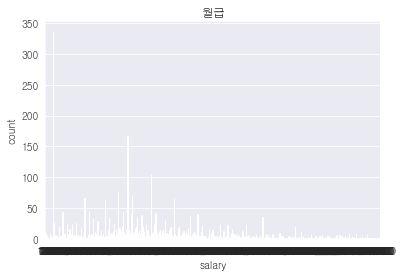

In [67]:
# na 건수는
df['salary'].isnull().sum() # --> 8973

# 그래프 그리기 --> 그래프에서 데이터 형태를 파악
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 포트깨지는 현상 대응하기
from matplotlib import font_manager, rc
# font_path = "./한글폰트.ttf" # 폰트 파일 위치
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# countplot : 각 카테고리 값별로 데이터가 얼마나 있는지 표시
ax = plt.subplots()
ax = sns.countplot(x="salary", data=df)
plt.title("월급")
# plt.ylim(0,180)
# plt.xlim(0,400)
plt.show()

In [68]:
# 월급 구간 설정하기
# 구간 정의 (0-~2200을 100단위싹)
bins = list(range(0,2201, 100))
bins # 데이터 확인

# 레이블 준비
# --> 레이블: 100미만, 200미만 ...
bins_labels = [ str(x)+"미만" for x in bins[1:]]
bins_labels

# df에 "salary_bin" 추가
df['salary_bin'] = pd.cut(df['salary'], bins, right=False, labels=bins_labels[:])
# 데이터 확인하기
df[['salary','salary_bin']]

,salary,salary_bin
6729,27.0,100미만
12836,NaN,NaN
7132,480.0,500미만
7130,NaN,NaN
7127,NaN,NaN
...,...,...
2528,NaN,NaN
7659,185.0,200미만
7658,NaN,NaN
2512,NaN,NaN


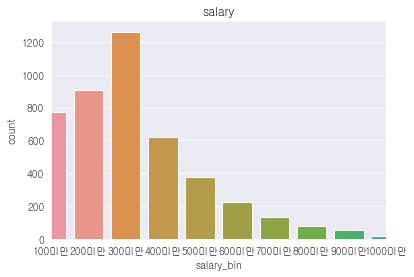

In [69]:
# 그래프를 그려보자
ax = plt.subplots()
ax = sns.countplot(x="salary_bin", data=df)
plt.title("salary")
plt.xlim(0,9)
plt.show()

In [71]:
#요약표 작성
old_salary = df.groupby('old')['salary'].agg(**{
    'salary_mean':'mean', 'salary_median':'median'}).reset_index() ## 성별 월급
old_salary.loc[80:]

,old,salary_mean,salary_median
80,83,30.233333,27.0
81,84,28.173913,27.0
82,85,29.095238,27.0
83,86,26.666667,27.0
84,87,27.000000,27.0
85,88,25.300000,27.0
86,89,135.166667,30.5
87,90,27.000000,27.0
88,91,27.000000,27.0
89,92,27.000000,27.0


In [72]:
# max값
old_salary['salary_mean'].max()
con1 = old_salary['salary_mean'] >= old_salary['salary_mean'].max()
old_salary.loc[con1].head()

,old,salary_mean,salary_median
43,46,388.824742,350.0


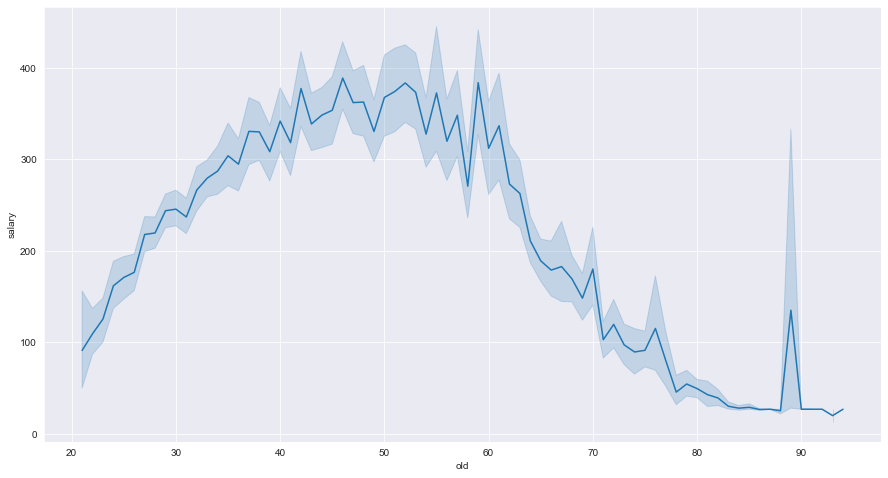

In [73]:
df = df.sort_values(by='old')
fig = plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.lineplot(data= df, x= "old", y= "salary")
plt.show()

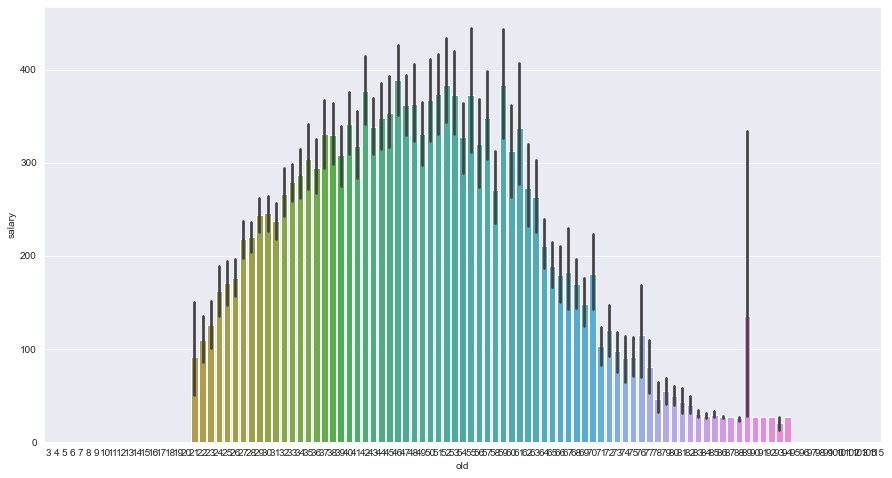

In [74]:
df = df.sort_values(by='old')
fig = plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.barplot(data= df, x= "old", y= "salary")
plt.show()

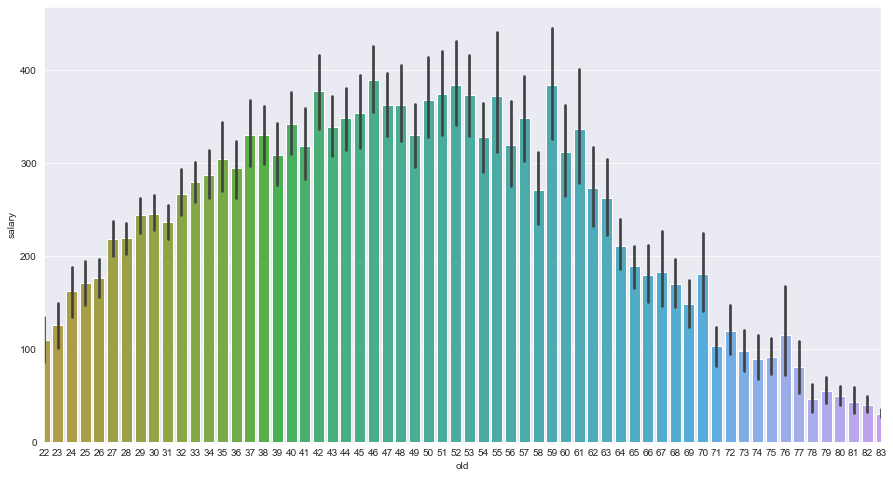

In [75]:
df = df.sort_values(by='old')
fig = plt.figure(figsize=(15, 8))
sns.set_style('darkgrid')
sns.barplot(data= df, x= "old", y= "salary")
plt.xlim(19,80)
plt.show()

19까지, 95세 이상은 월급이 없다. <br>
46세가 가장 많은 월급을 받는다. <br>
26세까지는 월평균 급여가 200이 안된다. <br>
55세 이후로는 월평균급여가 줄어 든다. <br>
71세 이후에는 20대보다 낮은 월급을 받는다.